Data Prep

In [139]:
import pandas as pd

In [133]:
consumption = pd.read_csv('Electricity+Consumption/powerconsumption.csv', usecols=['Datetime', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], parse_dates=['Datetime']).assign(total_consumption=lambda x: x['PowerConsumption_Zone1'] + x['PowerConsumption_Zone2'] + x['PowerConsumption_Zone3'], hour= lambda x: x['Datetime'].dt.hour, day_of_week = lambda x : x['Datetime'].dt.dayofweek)

In [167]:
filter =consumption[consumption['day_name']=='Monday']
filter

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week,day_name
144,2017-01-02 00:00:00,26703.79747,18047.41641,17916.14458,62667.35846,0,0,Monday
145,2017-01-02 00:10:00,26169.11392,17507.59878,17349.39759,61026.11029,0,0,Monday
146,2017-01-02 00:20:00,25622.27848,17120.97264,16985.06024,59728.31136,0,0,Monday
147,2017-01-02 00:30:00,24972.15190,16785.41033,16586.02410,58343.58633,0,0,Monday
148,2017-01-02 00:40:00,24437.46835,16453.49544,16366.26506,57257.22885,0,0,Monday
...,...,...,...,...,...,...,...,...
51691,2017-12-25 23:10:00,30546.00760,25951.51887,13305.16206,69802.68853,23,0,Monday
51692,2017-12-25 23:20:00,29761.21673,25402.88432,12999.75990,68163.86095,23,0,Monday
51693,2017-12-25 23:30:00,29049.42966,24773.24333,12619.44778,66442.12077,23,0,Monday
51694,2017-12-25 23:40:00,28234.22053,24077.32433,12221.84874,64533.39360,23,0,Monday


Visualise consumption over time
the power consumption for the month of jan 2017
-resample the data, so each row represents one-hour increments, rather than 10 min increments and calculate 
-filter down the data to the month Jan 2017
-create a stacked line chart using the 'power consumption' column


<Axes: title={'center': 'Hourly Electricity Consumption by Zone - January 2017'}, xlabel='Date', ylabel='Consumption (KwH)'>

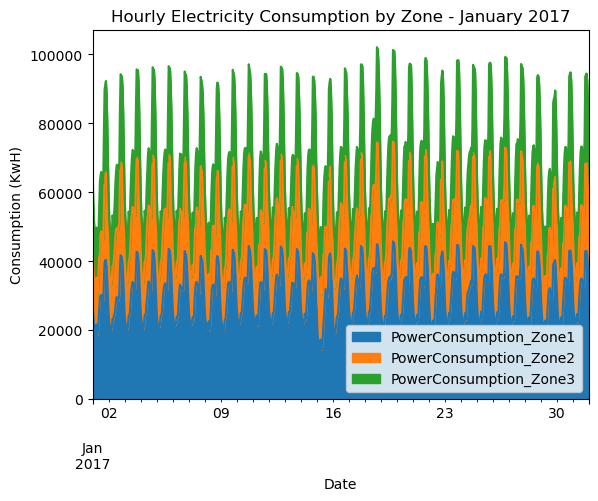

In [85]:
import seaborn as sns
(consumption
 .set_index('Datetime')
 .resample('h')['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']
 .mean()
 .loc['2017-01']
 .plot
 .area(
     title ='Hourly Electricity Consumption by Zone - January 2017',
     xlabel ='Date',
     ylabel = 'Consumption (KwH)'
     
 )
)

Visualize consumption seasonality
- build a heatmap
- 


In [205]:
import matplotlib.pyplot as plt


In [147]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [149]:
consumption['day_name'] = pd.Categorical (consumption['Datetime'].dt.day_name(), categories=day_of_week)

C:\Users\szewc\AppData\Local\Temp\ipykernel_886068\2425449394.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  consumption.pivot_table(


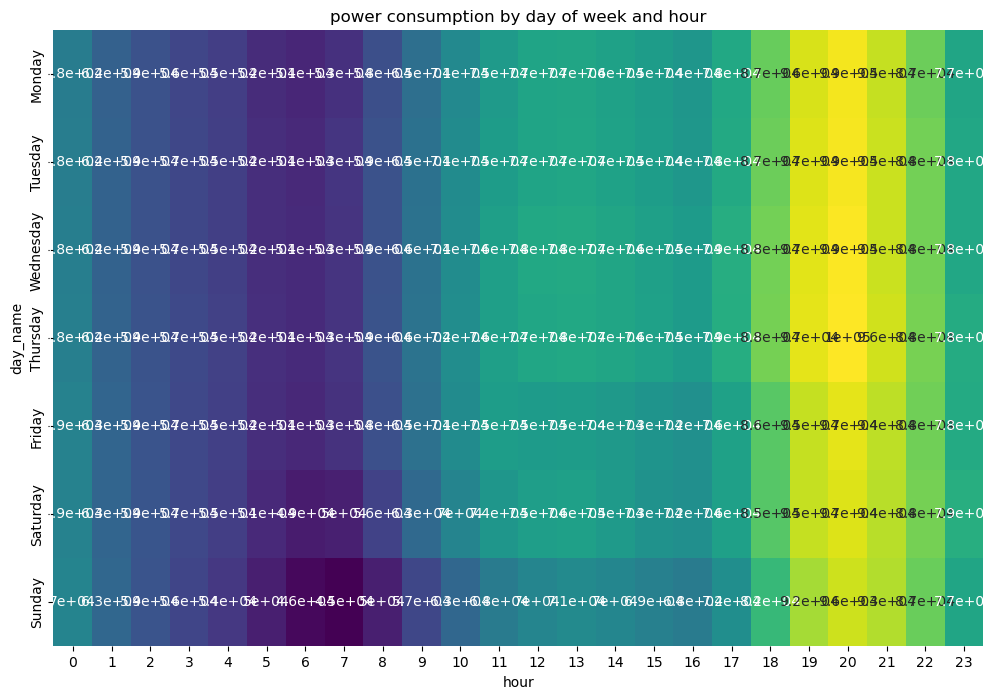

In [207]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    consumption.pivot_table(
        index='day_name',
        columns='hour',
        values='total_consumption',
        aggfunc='mean',
        
    
    ),
    cbar=None,

    cmap='viridis',
).set(title='power consumption by day of week and hour')

plt.show()

In [145]:
consumption.pivot_table(
        index='day_name',
        columns='hour',
        values='total_consumption',
        aggfunc='mean',
        
    
    )

KeyError: 'day_name'

In [193]:
filter = consumption.loc[(consumption['day_of_week']==0)&(consumption['hour']==1)]

In [195]:
filter['total_consumption']

150      54993.10532
151      53731.49842
152      52966.95655
153      51659.23244
154      51103.51448
            ...     
51559    53201.46613
51560    52302.88909
51561    51509.50310
51562    50571.86836
51563    50264.97365
Name: total_consumption, Length: 312, dtype: float64

In [197]:
filter2 = consumption[(consumption['day_of_week']==0)&(consumption['hour']==1)]

In [199]:
filter2['total_consumption'].mean()

61755.42271672756

In [209]:
# Create the pivot table (if not already created)
pivot = consumption.pivot_table(
    index='day_name',
    columns='hour',
    values='total_consumption',
    aggfunc='mean',
)

# Get the mean for Monday at 1 AM
monday_1am_mean = pivot.at['Monday', 1]

print("The mean total consumption for Monday at 1 AM is:", monday_1am_mean)

The mean total consumption for Monday at 1 AM is: 61755.42271672756


C:\Users\szewc\AppData\Local\Temp\ipykernel_886068\1707728920.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = consumption.pivot_table(
